In [90]:
from IPython.core.interactiveshell import InteractiveShell

# pretty print only the last output of the cell
#InteractiveShell.ast_node_interactivity = "last_expr"
# pretty print all cell's output and not just the last one
InteractiveShell.ast_node_interactivity = "all"

In [91]:
from IPython.display import Markdown, display
def printmd(string, color=None):
    if color:
        colorstr = "<span style='color:{}'>{}</span>".format(color, string)
        display(Markdown(colorstr))
    else:
        display(Markdown(string))

#printmd("## title text")
#printmd("**bold text**")
#printmd("**bold and blue**", color="blue")

In [92]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import json
import seaborn as sns
#import plotly.plotly as py
#import plotly
#plotly.offline.init_notebook_mode() # run at the start of every notebook
import scipy
import statsmodels.api as sm # statistical modeling
import altair as alt
import vega_datasets

print(plt.style.available)
plt.style.use('ggplot')

plt.rcParams['figure.figsize'] = 8, 4

['seaborn-notebook', 'seaborn-dark-palette', 'seaborn-muted', 'seaborn-whitegrid', 'tableau-colorblind10', 'Solarize_Light2', 'dark_background', 'seaborn-white', 'bmh', 'seaborn-colorblind', 'seaborn-deep', 'seaborn-dark', 'seaborn-paper', 'fivethirtyeight', 'classic', 'seaborn-poster', 'seaborn-bright', '_classic_test', 'ggplot', 'fast', 'seaborn-ticks', 'seaborn-darkgrid', 'seaborn-pastel', 'seaborn', 'grayscale', 'seaborn-talk']


In [95]:
df_raw = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')

df1 = df_raw.drop(['Lat', 'Long'], axis=1)
# the hard way
df1.loc[(df1['Country/Region']=='US') & (df1['Province/State']=='Santa Clara County, CA'), :].head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20
316,"Santa Clara County, CA",US,0,0,0,0,0,0,0,0,...,20,20,32,38,38,0,0,0,0,0


In [96]:
# easier to set as index
di = df1.set_index(['Country/Region', 'Province/State'])
di.loc[(['US'], ['California','New York']),].head(10)

1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  \
Country/Region Province/State                                                
US             New York              0        0        0        0        0   
               California            0        0        0        0        0   

                               1/27/20  1/28/20  1/29/20  1/30/20  1/31/20  \
Country/Region Province/State                                                
US             New York              0        0        0        0        0   
               California            0        0        0        0        0   

                               ...  3/5/20  3/6/20  3/7/20  3/8/20  3/9/20  \
Country/Region Province/State  ...                                           
US             New York        ...       0       0       0       0       0   
               California      ...       0       0       0       0       0   

                               3/10/20  3/11/20  3/12/20  3/13/20  3/14/20  
Country/Region Province/State                                               
US             New York            173      220      328      421      525  
               California          144      177      221      282      340  

[2 rows x 53 columns]

In [97]:
di = di.stack()
di.head()


Country/Region  Province/State         
Thailand        NaN             1/22/20    2
                                1/23/20    3
                                1/24/20    5
                                1/25/20    7
                                1/26/20    8
dtype: int64

In [98]:
df = di.unstack(level=[0,1])
df.head()

Country/Region Thailand Japan Singapore Nepal Malaysia           Canada  \
Province/State      NaN   NaN       NaN   NaN      NaN British Columbia   
1/22/20               2     2         0     0        0                0   
1/23/20               3     1         1     0        0                0   
1/24/20               5     2         3     0        0                0   
1/25/20               7     2         3     1        3                0   
1/26/20               8     4         4     1        4                0   

Country/Region       Australia                     Cambodia  ... Gabon  \
Province/State New South Wales Victoria Queensland      NaN  ...   NaN   
1/22/20                      0        0          0        0  ...     0   
1/23/20                      0        0          0        0  ...     0   
1/24/20                      0        0          0        0  ...     0   
1/25/20                      0        0          0        0  ...     0   
1/26/20                      3        1          0        0  ...     0   

Country/Region Guatemala Guernsey Mauritania Rwanda Saint Lucia  \
Province/State       NaN      NaN        NaN    NaN         NaN   
1/22/20                0        0          0      0           0   
1/23/20                0        0          0      0           0   
1/24/20                0        0          0      0           0   
1/25/20                0        0          0      0           0   
1/26/20                0        0          0      0           0   

Country/Region Saint Vincent and the Grenadines Suriname                   US  \
Province/State                              NaN      NaN Virgin Islands, U.S.   
1/22/20                                       0        0                    0   
1/23/20                                       0        0                    0   
1/24/20                                       0        0                    0   
1/25/20                                       0        0                    0   
1/26/20                                       0        0                    0   

Country/Region occupied Palestinian territory  
Province/State                            NaN  
1/22/20                                     0  
1/23/20                                     0  
1/24/20                                     0  
1/25/20                                     0  
1/26/20                                     0  

[5 rows x 442 columns]

In [112]:
df.loc[:,[('US', 'California'), ('US', 'Santa Clara County, CA')]].head()
df.loc[:,(['US'], ['California', 'Santa Clara County, CA'])].head()
df.loc[:,pd.IndexSlice[:,['California', 'Santa Clara County, CA']]].head()
df.loc['3/1/20':,pd.IndexSlice[:,['California', 'Santa Clara County, CA']]]

Country/Region         US                       
Province/State California Santa Clara County, CA
1/22/20                 0                      0
1/23/20                 0                      0
1/24/20                 0                      0
1/25/20                 0                      0
1/26/20                 0                      0

Country/Region         US                       
Province/State California Santa Clara County, CA
1/22/20                 0                      0
1/23/20                 0                      0
1/24/20                 0                      0
1/25/20                 0                      0
1/26/20                 0                      0

Country/Region         US                       
Province/State California Santa Clara County, CA
1/22/20                 0                      0
1/23/20                 0                      0
1/24/20                 0                      0
1/25/20                 0                      0
1/26/20                 0                      0

Country/Region         US                       
Province/State California Santa Clara County, CA
3/1/20                  0                      3
3/2/20                  0                      9
3/3/20                  0                     11
3/4/20                  0                     11
3/5/20                  0                     20
3/6/20                  0                     20
3/7/20                  0                     32
3/8/20                  0                     38
3/9/20                  0                     38
3/10/20               144                      0
3/11/20               177                      0
3/12/20               221                      0
3/13/20               282                      0
3/14/20               340                      0

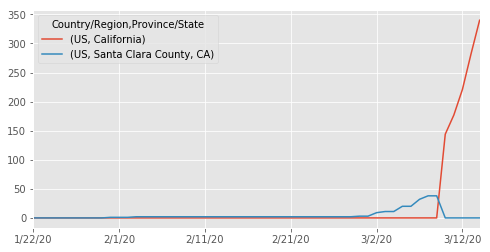

In [113]:
df.loc[:,pd.IndexSlice[:,['California', 'Santa Clara County, CA']]].plot()